# Neo4j DBインスタンスへの接続


In [43]:
!pip install networkx matplotlib
!pip install python-dotenv

In [44]:
!pip list > requirements.txt

In [1]:
# import dotenv 
import os
import sys 
from neo4j import GraphDatabase
from dotenv import load_dotenv
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
load_dotenv()

True

In [3]:
URI = os.getenv("NEO4J_URI")
AUTH = (os.getenv("NEO4J_USERNAME"), os.getenv("NEO4J_PASSWORD"))

try:
    with GraphDatabase.driver(URI, auth=AUTH) as driver:
        driver.verify_connectivity()
        print("Connection established.")
except Exception as e:
    print(f"Error: {e}", file=sys.stderr)

Connection established.


/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_13768/816783561.py:27: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_node(p.id, label=p.get("name", p.element_id))
/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_13768/816783561.py:28: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_node(pt.id, label=pt.get("name", pt.element_id))
/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_13768/816783561.py:31: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_edge(p.id, pt.id)


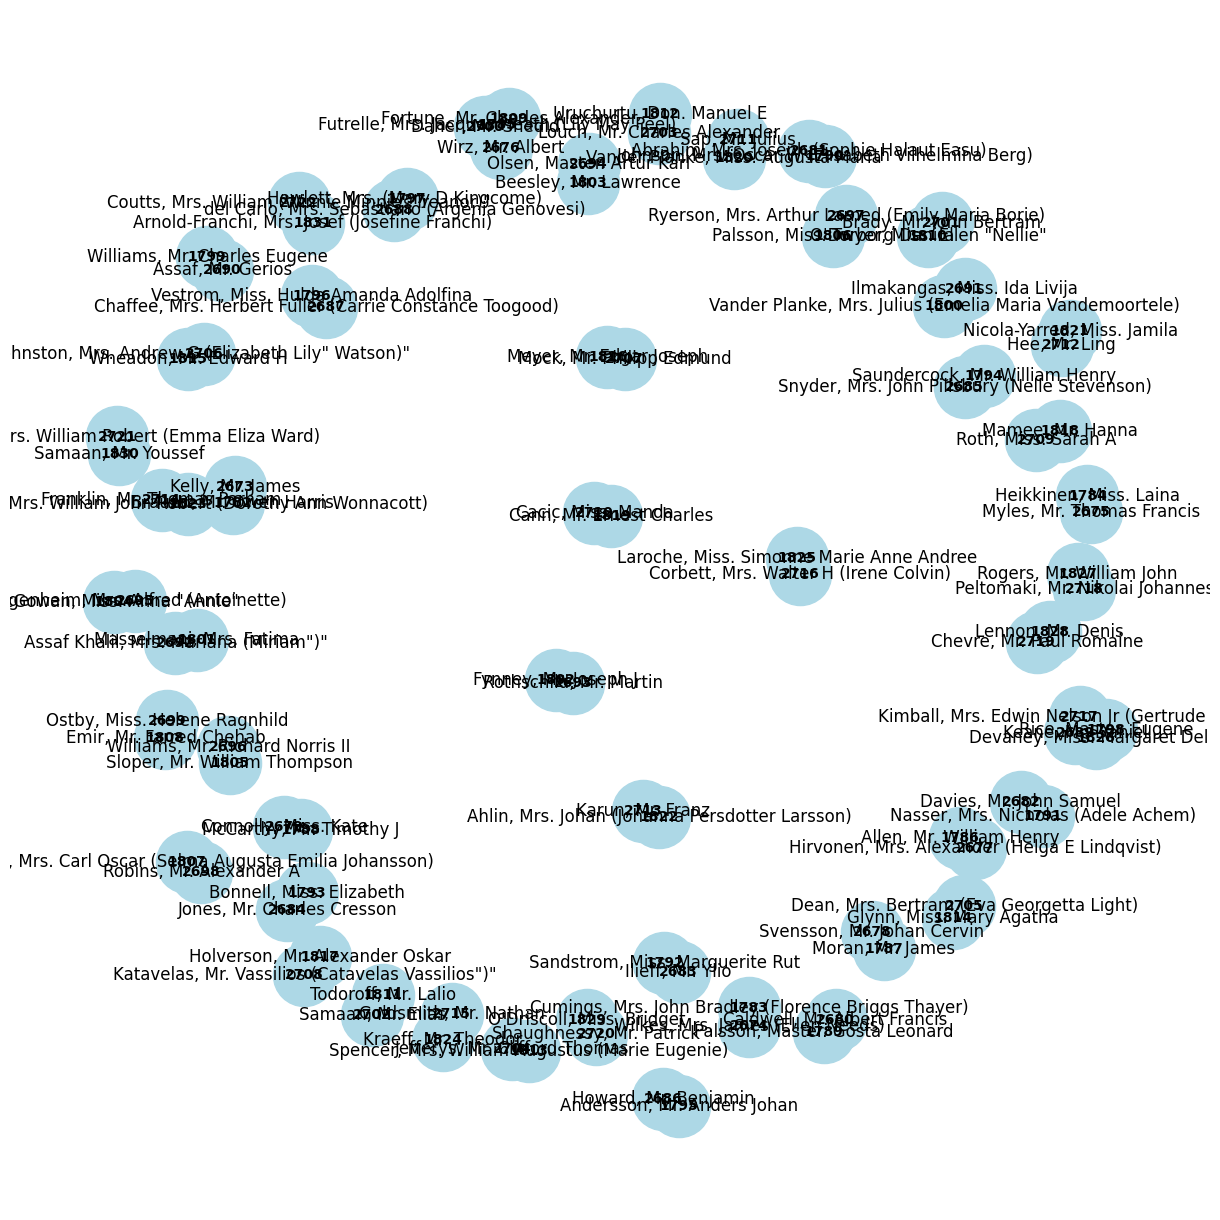

In [4]:
# Neo4jへの接続設定

# クエリを実行してPersonとPersonTestノードを取得
query = """
MATCH (p:Person)
WITH COLLECT(p) AS persons
MATCH (pt:PersonTest)
WITH persons, COLLECT(pt) AS personTests
UNWIND RANGE(0, 49) AS idx
RETURN persons[idx] AS p, personTests[idx] AS pt
"""

# データベースからクエリの結果を取得
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    with driver.session() as session:
        result = session.run(query)
        
        # NetworkXのグラフオブジェクトを作成
        G = nx.Graph()

        # ノードとエッジを追加
        for record in result:
            p = record["p"]
            pt = record["pt"]
            
            # ノードを追加
            G.add_node(p.id, label=p.get("name", p.element_id))
            G.add_node(pt.id, label=pt.get("name", pt.element_id))
            
            # エッジを追加（PersonとPersonTestの間に関係があるように見せるため）
            G.add_edge(p.id, pt.id)

# グラフの描画
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # ノードの位置を計算
nx.draw(G, pos, with_labels=True, node_color="lightblue", font_size=10, node_size=2000, font_weight='bold')

# ノードラベルの描画
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels)

plt.show()